In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import re
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [136]:
df_obs = pd.read_csv("./hospiedata/obs_table_cleaned_expanded_thresholded.csv", parse_dates=['timestamp_insert'])
df_obs = df_obs.rename(columns={'patientid': 'PatientID'})
df_ptc = pd.read_csv("./hospiedata/pid_to_attr.csv")
df_ptc.head()

C:\Users\prate\Anaconda3\envs\det2\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PatientID,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis
0,96,1.0,1.0,81.0,M,1.0,1.0,Head-neck
1,100,1.0,1.0,65.0,M,1.0,1.0,Diagnosis is not cancer
2,103,1.0,1.0,87.0,F,1.0,1.0,Head-neck
3,101,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,15,1.0,1.0,40.0,F,1.0,1.0,Stomach


In [137]:
df_obs.head()

,Unnamed: 0,idehr,timestamp_insert,PatientID,opt_hypotrophy,opt_anxiety,chk_eloquence,anorexia,personal_hygiene,urine_elimination,mobility,hemorrhagic_manifestation,speech,cough,nausea,memory_deficit,cognitive_deficit,active_diuresis,lack_of_appetite,opt_cooperation,opt_memory_deficit_type,opt_care_giver,chk_gastrointestinal_symptoms,chk_bowel_symptoms,opt_dehydration,opt_attitude,pain_freq,pain_relief,breath,consolability,body_language,facial_expression,awareness,asthenia,cachexia,dyspnoea,motor_performance,body_temp,agitation_behavior_freq,diet,cognitive_state,feces_elimination,consumption_help,chk_ausili_presidi_urinary_catheter,chk_ausili_presidi_bladder_catheter,chk_ausili_presidi_absorbency,chk_ausili_presidi_urocondom,chk_ausili_presidi_disposable_sleepers,mood_fear,mood_despair,mood_sadness,mood_helplessness,mood_denial,mood_hopelessness,mood_sense_of_helplessness,mood_negation,mood_sense_of_solitude,mood_senso_dimpotenza,mood_desperation,mood_sense_of_impotence,mood_apathy,mood_hostility,mood_loneliness,mood_closure_in_itself,mood_sense_of_powerlessness,mood_serenity,mood_sense_of_loneliness,mood_demoralisation,mood_happiness,mood_irritability,mood_disappointment,mood_rage,mood_anger
0,0,15,2015-01-12 11:11:44.807,70,NaN,NaN,fluent speech # 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,memory deficits # 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,11,2015-01-12 11:16:03.327,66,Hypotrophy # 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate # 2,NaN,applicant from severe stress # 8,NaN,Apyrexia,quiet # 0,NaN,memory deficits # 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,16,2015-01-12 11:40:00.510,71,Hypotrophy # 0,NaN,confabulation # 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,confused at times 0 #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,16,2015-01-12 11:42:15.270,71,Hypotrophy # 0,NaN,confabulation # 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Severe # 3,NaN,NaN,NaN,Apyrexia,quiet # 0,NaN,confused at times 0 #,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1020,2015-01-12 11:59:29.773,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate # 2,NaN,applicant mild strain # 6,NaN,Apyrexia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
df_obs= df_obs[['idehr', 'PatientID', 'pain_relief', 'timestamp_insert']]
df_obs.head()

,idehr,PatientID,pain_relief,timestamp_insert
0,15,70,NaN,2015-01-12 11:11:44.807
1,11,66,NaN,2015-01-12 11:16:03.327
2,16,71,NaN,2015-01-12 11:40:00.510
3,16,71,NaN,2015-01-12 11:42:15.270
4,1020,86,NaN,2015-01-12 11:59:29.773


In [139]:
df_obs.pain_relief.value_counts()

100% - Total Relief # 10    39481
90% # 9                     15662
80% # 8                      5370
70% # 7                       894
60% # 6                       311
50% # 5                       138
40% # 4                        41
30% # 3                        41
0% - No relief # 0             27
20% # 2                        15
10% # 1                         8
Name: pain_relief, dtype: int64

In [140]:
df_obs.shape

(312765, 4)

In [141]:
# merge into single frame
df_pr = df_obs.merge(df_ptc, on='PatientID', how='inner')
df_pr = df_pr[df_pr['pain_relief'].notna()]
df_pr.head()

,idehr,PatientID,pain_relief,timestamp_insert,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis
295,15,70,100% - Total Relief # 10,2015-01-15 17:43:44,1.0,0.0,85.0,F,1.0,1.0,Uterus
301,15,70,90% # 9,2015-01-18 16:44:22,1.0,0.0,85.0,F,1.0,1.0,Uterus
303,15,70,100% - Total Relief # 10,2015-01-21 06:03:19,1.0,0.0,85.0,F,1.0,1.0,Uterus
304,15,70,80% # 8,2015-01-21 12:49:56,1.0,0.0,85.0,F,1.0,1.0,Uterus
305,15,70,80% # 8,2015-01-21 16:39:30,1.0,0.0,85.0,F,1.0,1.0,Uterus


In [142]:
# convert to numerical format
df_pr.loc[df_pr['pain_relief'] == '100% - Total Relief # 10', 'pain_relief'] = np.float(100.0)
df_pr.loc[df_pr['pain_relief'] == '90% # 9', 'pain_relief'] = np.float(90.0)
df_pr.loc[df_pr['pain_relief'] == '80% # 8', 'pain_relief'] = np.float(80.0)
df_pr.loc[df_pr['pain_relief'] == '70% # 7', 'pain_relief'] = np.float(70.0)
df_pr.loc[df_pr['pain_relief'] == '60% # 6', 'pain_relief'] = np.float(60.0)
df_pr.loc[df_pr['pain_relief'] == '50% # 5', 'pain_relief'] = np.float(50.0)
df_pr.loc[df_pr['pain_relief'] == '40% # 4', 'pain_relief'] = np.float(40.0)
df_pr.loc[df_pr['pain_relief'] == '30% # 3', 'pain_relief'] = np.float(30.0)
df_pr.loc[df_pr['pain_relief'] == '20% # 2', 'pain_relief'] = np.float(20.0)
df_pr.loc[df_pr['pain_relief'] == '10% # 1', 'pain_relief'] = np.float(10.0)
df_pr.loc[df_pr['pain_relief'] == '0% - No relief # 0', 'pain_relief'] = np.float(0.0)

In [143]:
df_pr['pain_relief'] = df_pr['pain_relief'].astype(str).astype(float)

In [144]:
df_pr.pain_relief.dtype

dtype('float64')

In [145]:
df_pr.pain_relief.value_counts()

100.0    39481
90.0     15662
80.0      5370
70.0       894
60.0       311
50.0       138
30.0        41
40.0        41
0.0         27
20.0        15
10.0         8
Name: pain_relief, dtype: int64

In [122]:
# START OF PROTOTYPE
df1 = df_pr[df_pr['PatientID'] == 70].reset_index(drop=True)
# df_pr.PatientID.value_counts()

In [123]:
df1.pain_relief.unique()

array([100.,  90.,  80.])

In [124]:
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis
0,15,70,100.0,2015-01-15 17:43:44,1.0,0.0,85.0,F,1.0,1.0,Uterus
1,15,70,90.0,2015-01-18 16:44:22,1.0,0.0,85.0,F,1.0,1.0,Uterus
2,15,70,100.0,2015-01-21 06:03:19,1.0,0.0,85.0,F,1.0,1.0,Uterus
3,15,70,80.0,2015-01-21 12:49:56,1.0,0.0,85.0,F,1.0,1.0,Uterus
4,15,70,80.0,2015-01-21 16:39:30,1.0,0.0,85.0,F,1.0,1.0,Uterus


In [125]:
df1['Day'] = df1['timestamp_insert'].dt.strftime('%D')
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis,Day
0,15,70,100.0,2015-01-15 17:43:44,1.0,0.0,85.0,F,1.0,1.0,Uterus,01/15/15
1,15,70,90.0,2015-01-18 16:44:22,1.0,0.0,85.0,F,1.0,1.0,Uterus,01/18/15
2,15,70,100.0,2015-01-21 06:03:19,1.0,0.0,85.0,F,1.0,1.0,Uterus,01/21/15
3,15,70,80.0,2015-01-21 12:49:56,1.0,0.0,85.0,F,1.0,1.0,Uterus,01/21/15
4,15,70,80.0,2015-01-21 16:39:30,1.0,0.0,85.0,F,1.0,1.0,Uterus,01/21/15


In [126]:
df1['Day'] = pd.to_datetime(df1['Day'])

In [127]:
df1['date_diff'] = df1['Day'] - df1.loc[0, 'Day']

In [128]:
df1.head()

,idehr,PatientID,pain_relief,timestamp_insert,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis,Day,date_diff
0,15,70,100.0,2015-01-15 17:43:44,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-15,0 days
1,15,70,90.0,2015-01-18 16:44:22,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-18,3 days
2,15,70,100.0,2015-01-21 06:03:19,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days
3,15,70,80.0,2015-01-21 12:49:56,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days
4,15,70,80.0,2015-01-21 16:39:30,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days


In [129]:
df1 = df1.drop(['timestamp_insert'], axis=1)
df1.head()

,idehr,PatientID,pain_relief,EHR,AMB,Age,Sex,when_needed,standard,Diagnosis,Day,date_diff
0,15,70,100.0,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-15,0 days
1,15,70,90.0,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-18,3 days
2,15,70,100.0,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days
3,15,70,80.0,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days
4,15,70,80.0,1.0,0.0,85.0,F,1.0,1.0,Uterus,2015-01-21,6 days


In [130]:
df1.pain_relief.dtype

dtype('float64')

In [131]:
df1.groupby(['date_diff']).mean()

,idehr,PatientID,pain_relief,EHR,AMB,Age,when_needed,standard
date_diff,,,,,,,,
0 days,15,70,100.000000,1.0,0.0,85.0,1.0,1.0
3 days,15,70,90.000000,1.0,0.0,85.0,1.0,1.0
6 days,15,70,86.666667,1.0,0.0,85.0,1.0,1.0
7 days,15,70,96.666667,1.0,0.0,85.0,1.0,1.0
8 days,15,70,86.666667,1.0,0.0,85.0,1.0,1.0
9 days,15,70,100.000000,1.0,0.0,85.0,1.0,1.0
11 days,15,70,80.000000,1.0,0.0,85.0,1.0,1.0
13 days,15,70,100.000000,1.0,0.0,85.0,1.0,1.0
14 days,15,70,95.000000,1.0,0.0,85.0,1.0,1.0


In [151]:
# get mean pain relief per cancer
df2 = df_pr.groupby(['Diagnosis', 'PatientID']).mean().groupby(['Diagnosis']).mean().reset_index().sort_values(by='Diagnosis')
df2.loc[21, 'Diagnosis'] = 'Endocrine Glands'
df2.loc[22, 'Diagnosis'] = 'Not known'
df2 = df2.sort_values(by='Diagnosis', ascending=False)
df2

,Diagnosis,idehr,pain_relief,EHR,AMB,Age,when_needed,standard
20,Uterus,4288.221755,88.553105,0.700000,0.950000,72.400000,1.0,0.750000
19,Stomach,3128.159496,95.509155,0.869565,0.913043,73.608696,1.0,0.869565
18,Skin,3307.364588,95.761812,1.000000,1.000000,76.705882,1.0,1.000000
17,Prostate,4009.030538,93.712617,0.818182,0.909091,80.393939,1.0,0.848485
16,Pleura-peritoneal,3202.340300,93.788951,0.888889,0.944444,82.722222,1.0,0.944444
15,Pancreas,3976.758253,94.459479,0.806452,0.935484,75.430108,1.0,0.806452
14,Ovary,3326.916943,91.354492,0.904762,0.952381,66.523810,1.0,0.952381
13,Other,2644.634328,94.129722,0.857143,1.000000,81.571429,1.0,0.857143
22,Not known,3273.440486,95.262611,0.923077,0.923077,82.692308,1.0,1.000000
12,Myelomas-other myeloproliferative diseases,3426.920828,96.747890,1.000000,0.875000,73.500000,1.0,1.000000


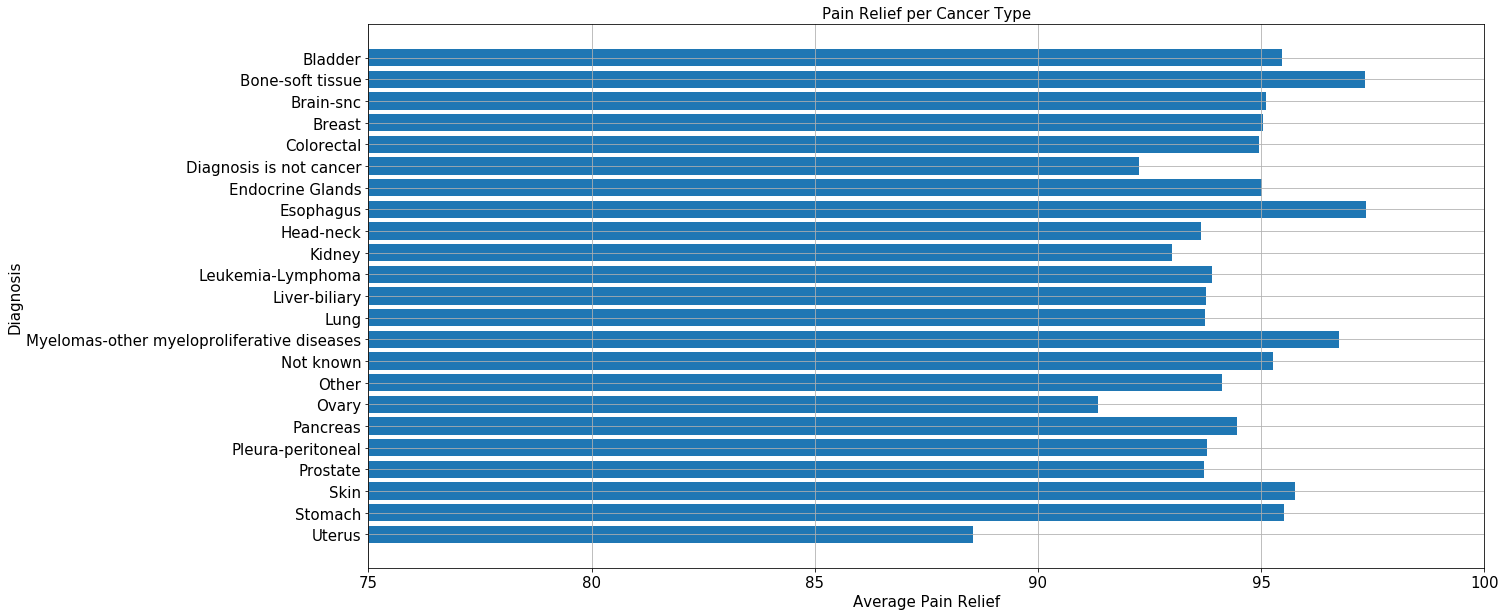

In [152]:
import matplotlib
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_width()
        ax.annotate('{}'.format(height),
                    xy=(height, rect.get_y()),
                    xytext=(30, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


plt.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 15})
plt.figure()
labels = df2['pain_relief'].round(2)
plt.barh(df2['Diagnosis'], labels)
plt.ylabel('Diagnosis', fontsize=15)
plt.xlabel('Average Pain Relief', fontsize=15)
plt.title('Pain Relief per Cancer Type', fontsize=15) # check
plt.grid()
plt.xlim(75, 100)
plt.savefig("./graphs/pain relief/pain_relief_avg.png")
plt.show()

In [98]:
df2['pain_relief'].round(2)

0     95.46
1     97.32
2     95.10
3     95.04
4     94.95
5     92.26
6     97.36
7     93.66
8     93.01
9     93.90
10    93.77
11    93.74
12    96.75
13    94.13
14    91.35
15    94.46
16    93.79
17    93.71
18    95.76
19    95.51
20    88.55
21    95.02
22    95.26
Name: pain_relief, dtype: float64